

# > MULTIPLE LINEAR REGRESSION



In [2]:
# Importing libraries and reading te data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.shape

(1436, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
# Check for duplicates
if(df.duplicated().sum() != 0):
    print("DUPLICATES ARE PRESENT")
    print("No.of duplicated rows: ",df.duplicated().sum())
else:
    print("NO DUPLICATES")

# Print duplicated values
df[df.duplicated(keep = False)]

DUPLICATES ARE PRESENT
No.of duplicated rows:  1


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [7]:
# Removing duplicates
df.drop_duplicates(inplace = True)
df.shape

print("No.of duplicated rows: ",df.duplicated().sum())

No.of duplicated rows:  0


In [8]:
# printing all the values and counts for each variable

import pandas as pd

df = pd.read_csv('ToyotaCorolla - MLR.csv')

for column in df.columns:
  print(f"Values and counts for column '{column}':")
  print(df[column].value_counts())
  print("\n")

Values and counts for column 'Price':
Price
8950     109
9950      84
7950      63
10950     62
11950     47
        ... 
11790      1
4750       1
4350       1
21125      1
10845      1
Name: count, Length: 236, dtype: int64


Values and counts for column 'Age_08_04':
Age_08_04
68    69
65    63
80    59
78    47
62    42
      ..
2      2
1      2
10     1
18     1
6      1
Name: count, Length: 77, dtype: int64


Values and counts for column 'KM':
KM
36000    9
1        8
43000    7
59000    7
75000    6
        ..
63792    1
64193    1
65170    1
65471    1
16916    1
Name: count, Length: 1263, dtype: int64


Values and counts for column 'Fuel_Type':
Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64


Values and counts for column 'HP':
HP
110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      9
98       2
71       1
73       1
Name: count, dtype: int64


Values and counts for column 'Automatic':
Automatic
0    

In [9]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [10]:
#  remove Cylinders from data as having only single value

df = df.drop('Cylinders', axis=1)
df


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


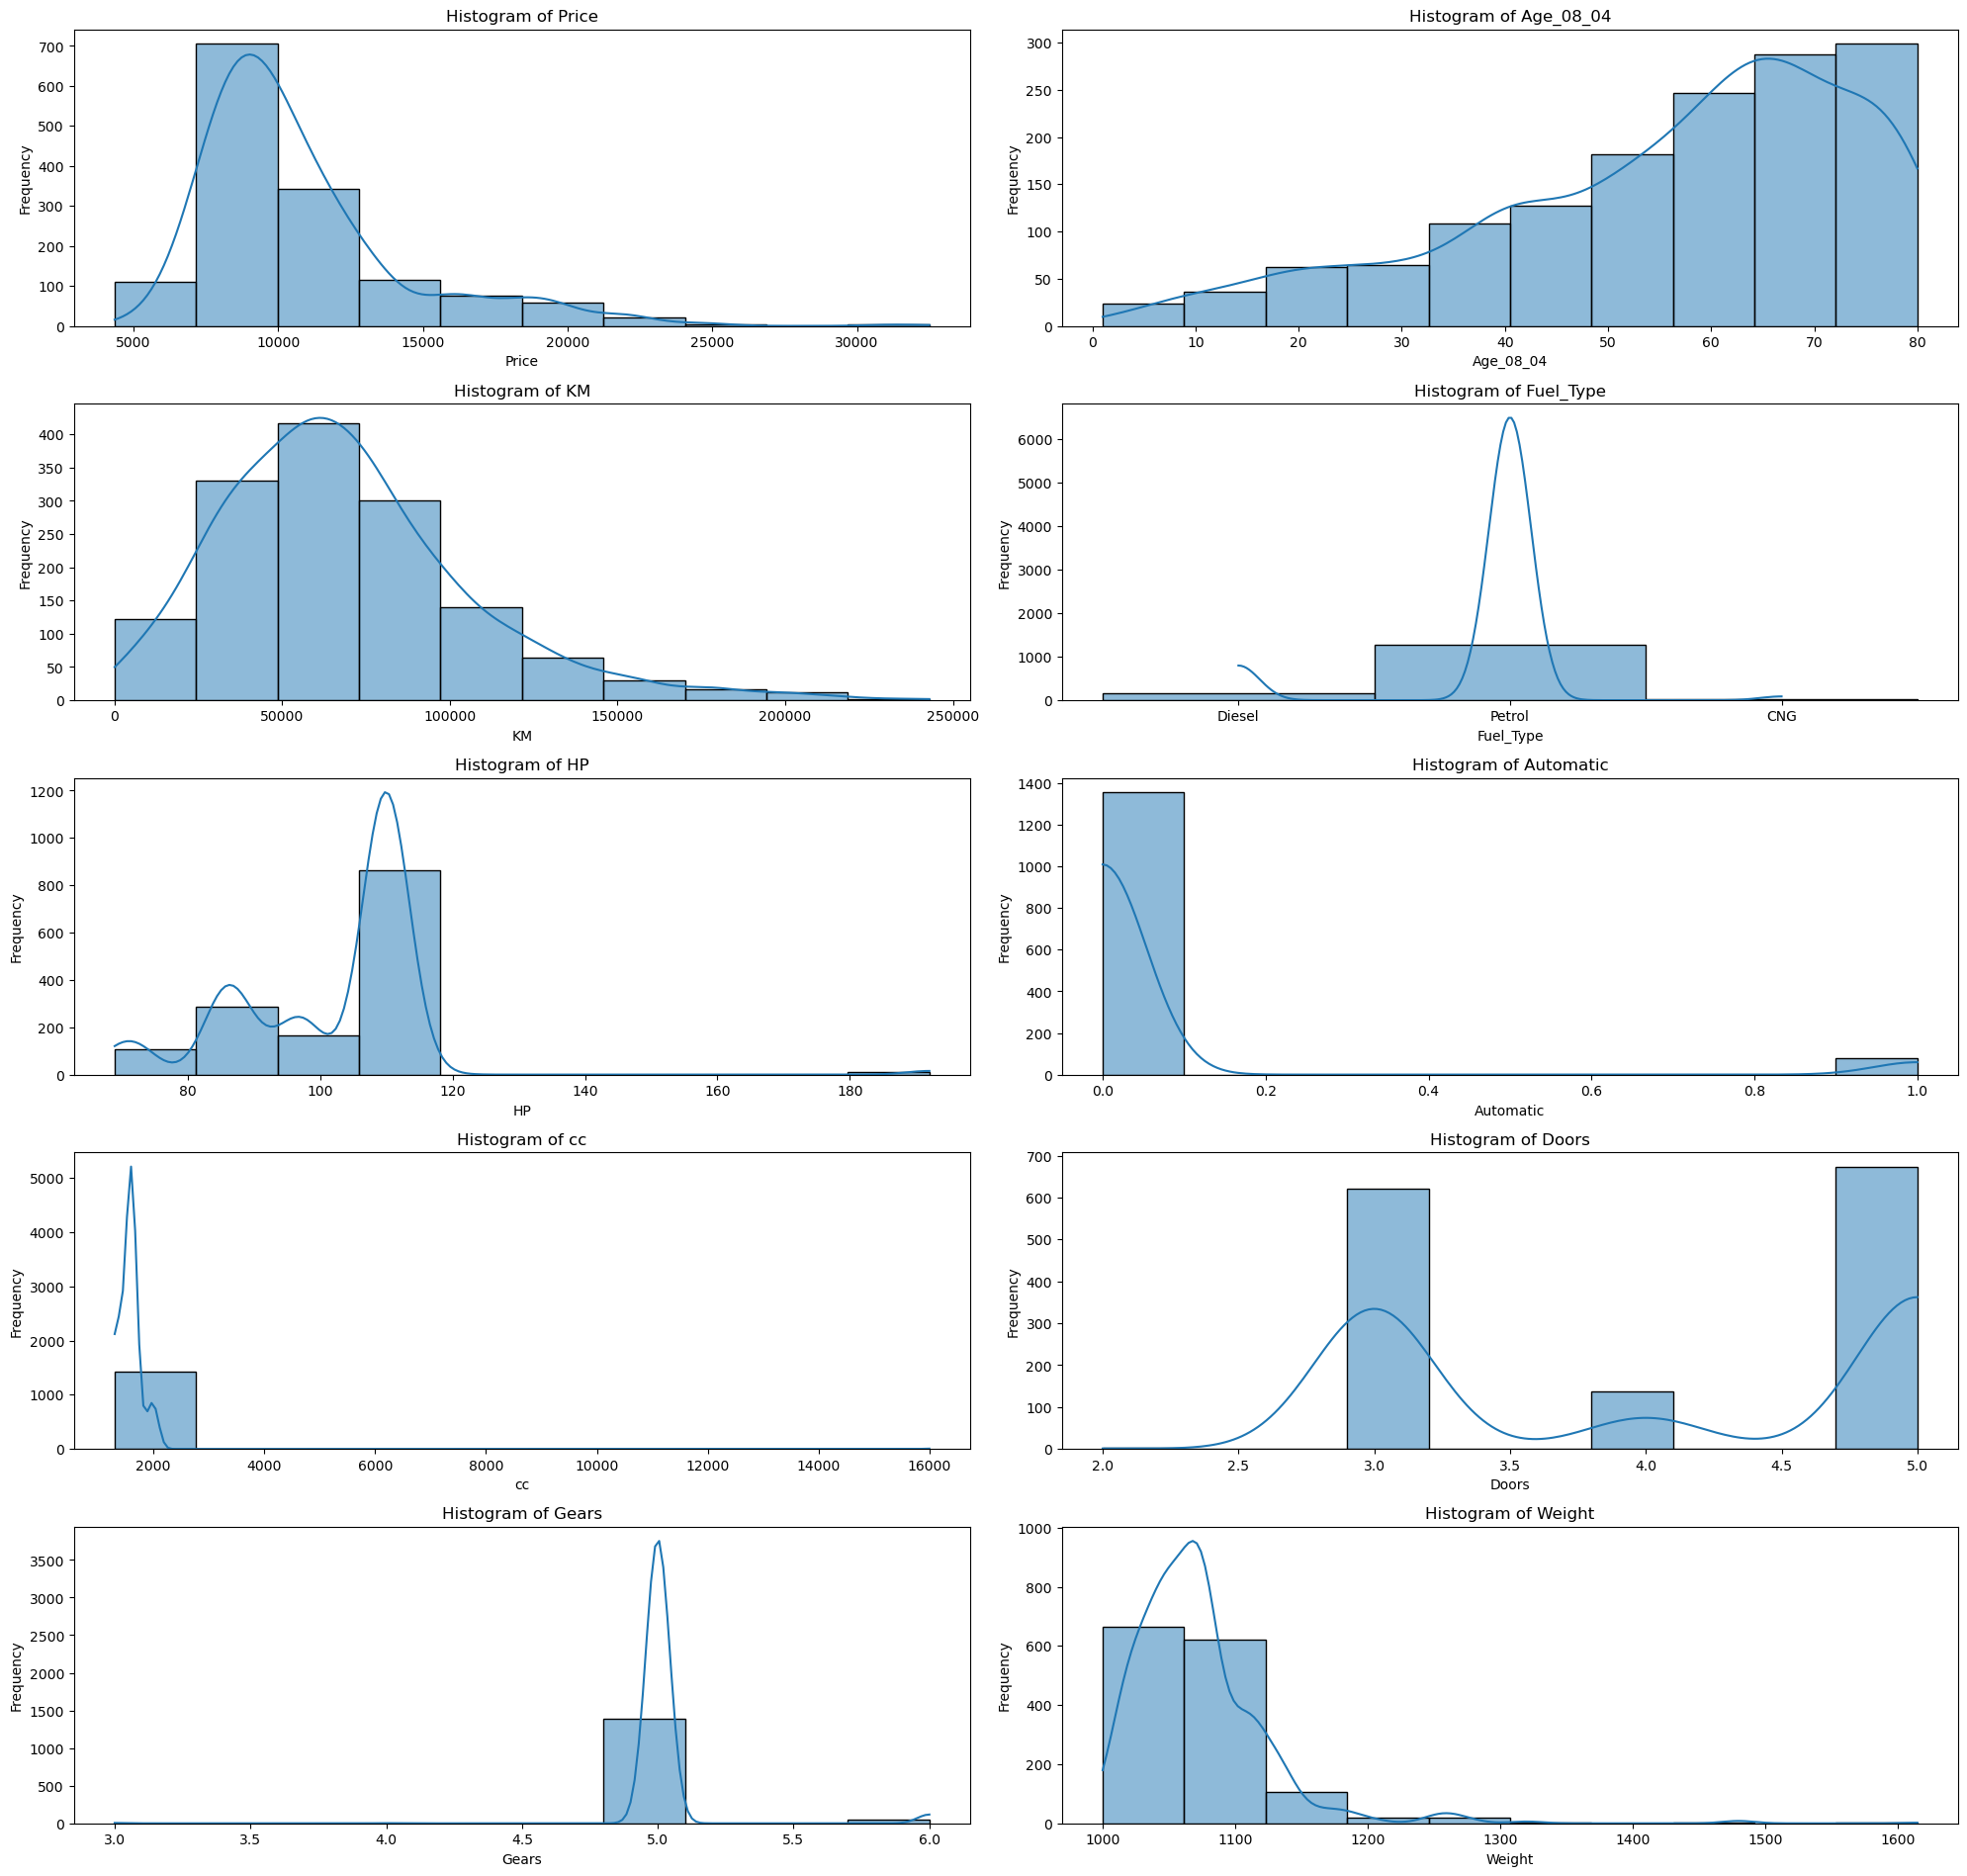

In [11]:
# HISTOGRAM
plt.figure(figsize = (20,30))
for i, column in enumerate( df,1):
    plt.subplot(8,2,i)
    sns.histplot(df[column], bins = 10, kde = True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

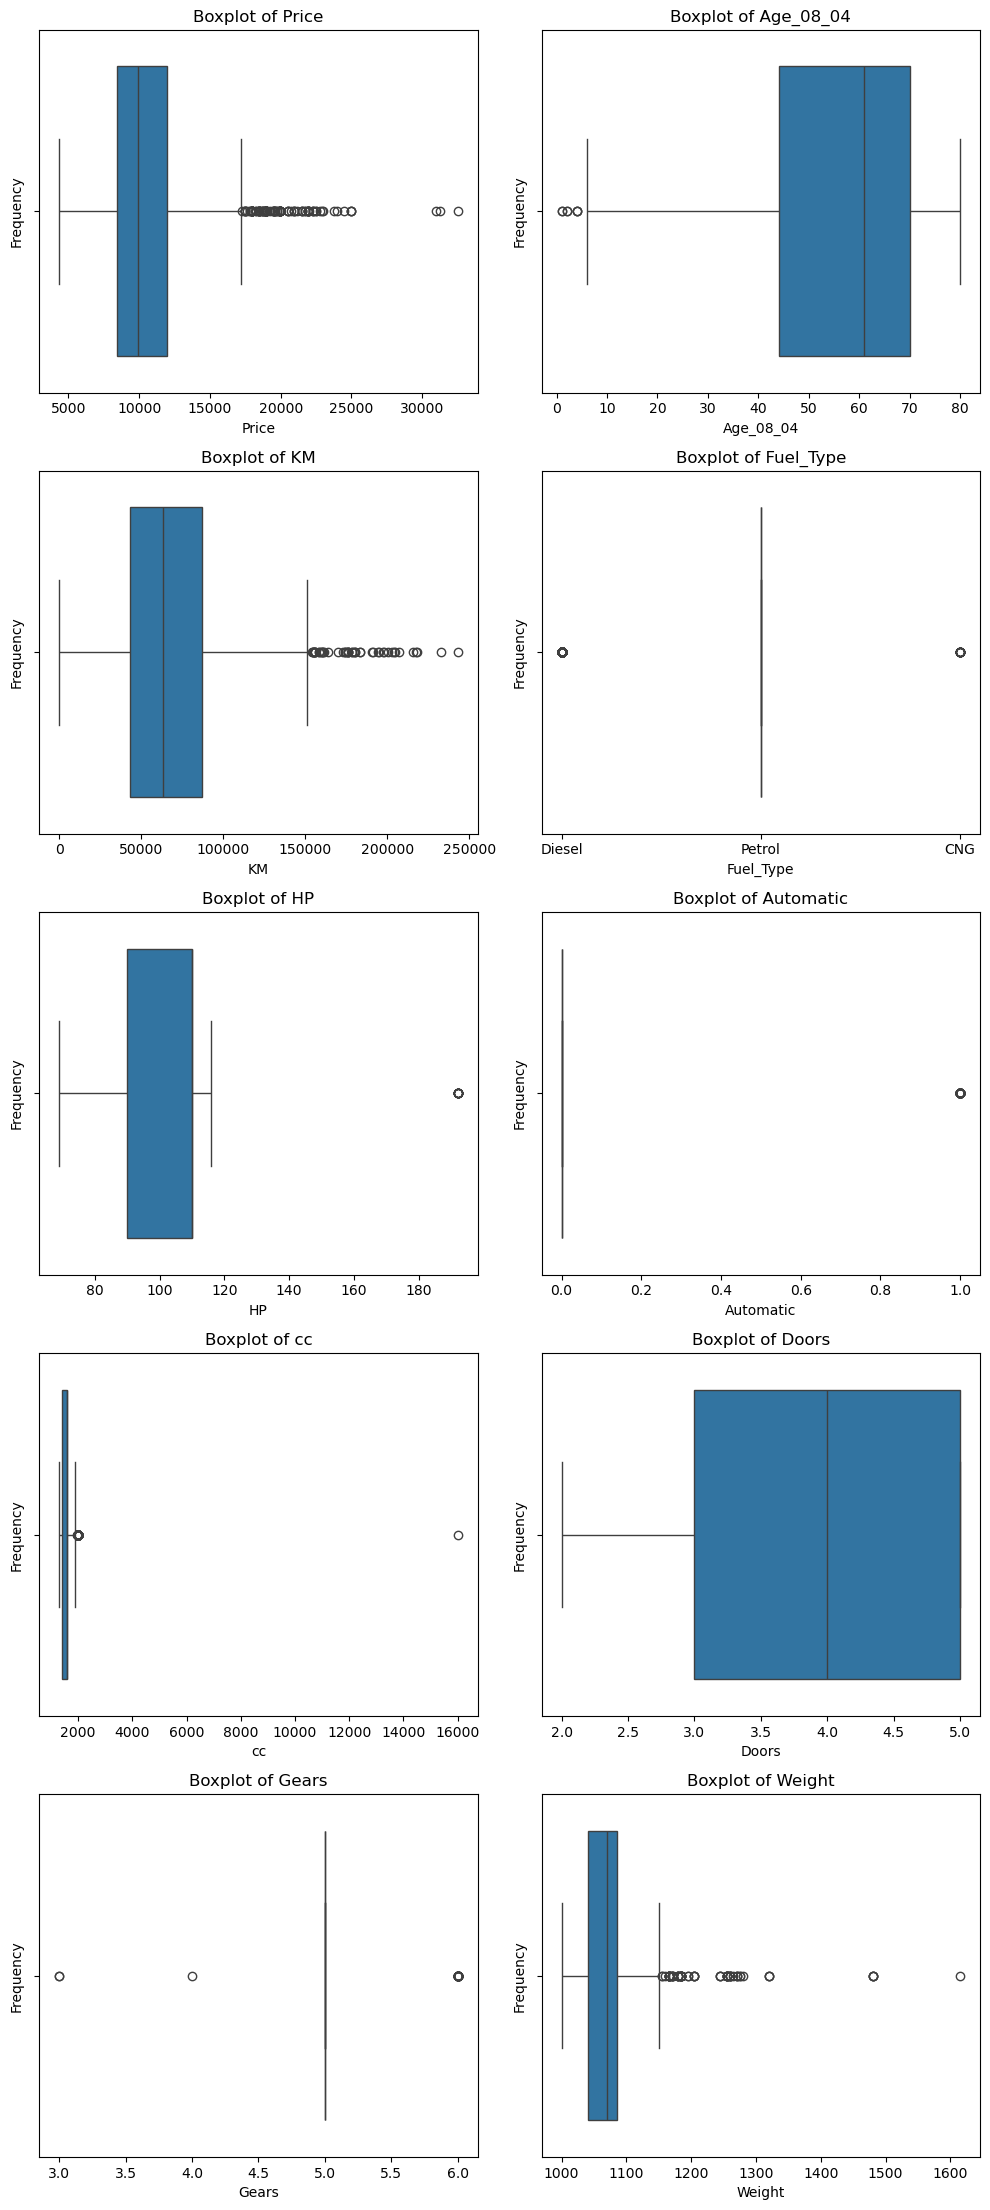

In [12]:
# BOXPLOT
plt.figure(figsize = (10,35))
for i, column in enumerate( df,1):
    plt.subplot(8,2,i)
    sns.boxplot(x = df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [13]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [14]:
# Getting numerical variables
df_num = df.drop(df.columns[[3,5]],axis=1)
df_num

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,1025
1432,10845,72,19000,86,1300,3,5,1015
1433,8500,71,17016,86,1300,3,5,1015
1434,7250,70,16916,86,1300,3,5,1015


In [15]:
# identify the outliers from every variables and filling the outlier values using capping method

import pandas as pd
import numpy as np

# function to detect and cap outliers using IQR method
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Iterate through numerical columns and cap outliers
for column in df_num.select_dtypes(include=np.number).columns:
    df_num = cap_outliers_iqr(df_num, column)


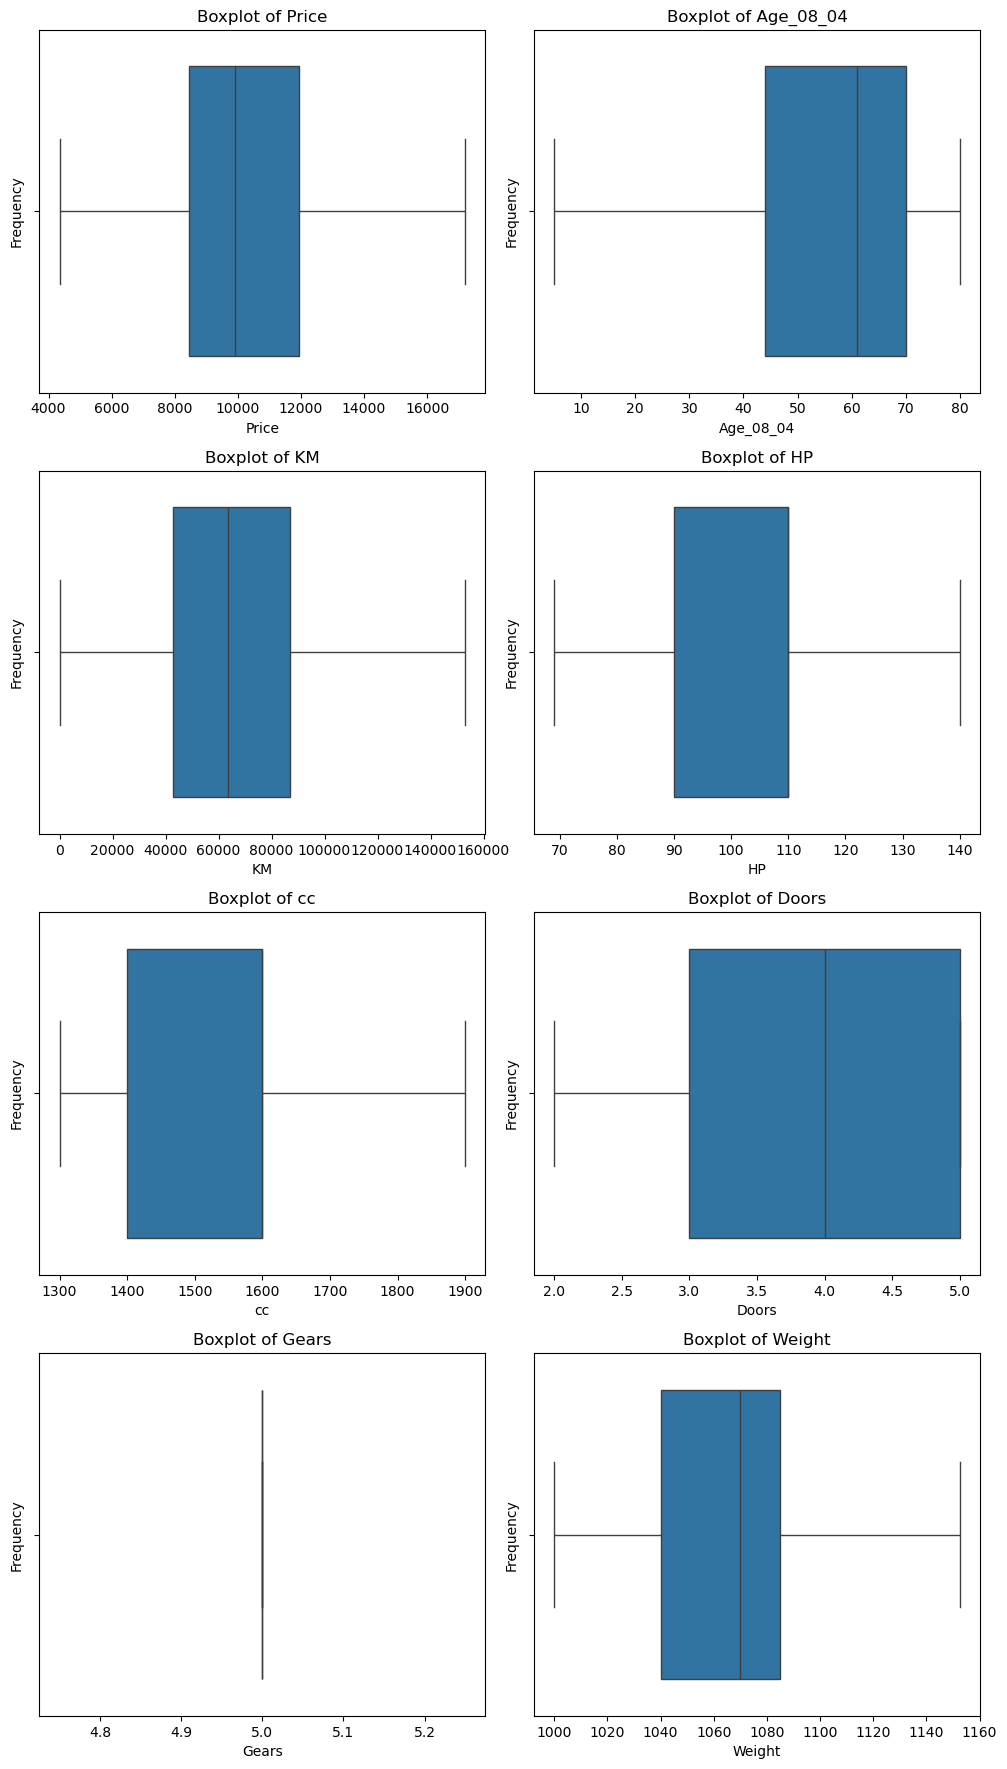

In [16]:
# BOXPLOT to check outliers
plt.figure(figsize = (10,35))
for i, column in enumerate( df_num,1):
    plt.subplot(8,2,i)
    sns.boxplot(x = df_num[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [17]:
# print the values and counts of variable Gears

print("Values and counts of 'Gears' in df_num:")
print(df_num['Gears'].value_counts())
print("\nValues and counts of 'Gears' in df:")
print(df['Gears'].value_counts())

Values and counts of 'Gears' in df_num:
Gears
5.0    1436
Name: count, dtype: int64

Values and counts of 'Gears' in df:
Gears
5    1390
6      43
3       2
4       1
Name: count, dtype: int64


In [18]:
# dropping Gears variable from data due to single value

df_num = df_num.drop('Gears', axis=1)


In [19]:
df_num

,Price,Age_08_04,KM,HP,cc,Doors,Weight
0,13500.0,23.0,46986.0,90.0,1900.0,3.0,1152.5
1,13750.0,23.0,72937.0,90.0,1900.0,3.0,1152.5
2,13950.0,24.0,41711.0,90.0,1900.0,3.0,1152.5
3,14950.0,26.0,48000.0,90.0,1900.0,3.0,1152.5
4,13750.0,30.0,38500.0,90.0,1900.0,3.0,1152.5
...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544.0,86.0,1300.0,3.0,1025.0
1432,10845.0,72.0,19000.0,86.0,1300.0,3.0,1015.0
1433,8500.0,71.0,17016.0,86.0,1300.0,3.0,1015.0
1434,7250.0,70.0,16916.0,86.0,1300.0,3.0,1015.0


In [20]:
# checking if outliers are present in data

# defining function for outliers
def detect_outliers_iqr(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)


for column in df_num.columns:
    outliers = detect_outliers_iqr(df_num, column)
    if outliers.any():
        print(f"Outliers detected in column: {column}")
        print(df_num[outliers])
    else:
        print(f"No outliers detected in column: {column}")

No outliers detected in column: Price
No outliers detected in column: Age_08_04
No outliers detected in column: KM
No outliers detected in column: HP
No outliers detected in column: cc
No outliers detected in column: Doors
No outliers detected in column: Weight


              Price  Age_08_04        KM        HP        cc     Doors  \
Price      1.000000  -0.895728 -0.608832  0.255640  0.132106  0.184211   
Age_08_04 -0.895728   1.000000  0.531839 -0.131284 -0.139771 -0.148137   
KM        -0.608832   0.531839  1.000000 -0.330495  0.255855 -0.037677   
HP         0.255640  -0.131284 -0.330495  1.000000  0.099605  0.120844   
cc         0.132106  -0.139771  0.255855  0.099605  1.000000  0.139616   
Doors      0.184211  -0.148137 -0.037677  0.120844  0.139616  1.000000   
Weight     0.509536  -0.478225 -0.001489  0.026578  0.718655  0.381955   

             Weight  
Price      0.509536  
Age_08_04 -0.478225  
KM        -0.001489  
HP         0.026578  
cc         0.718655  
Doors      0.381955  
Weight     1.000000  

Strong Correlations:
              Price  Age_08_04   KM   HP        cc  Doors    Weight
Price      1.000000  -0.895728  NaN  NaN       NaN    NaN       NaN
Age_08_04 -0.895728   1.000000  NaN  NaN       NaN    NaN       NaN
KM   

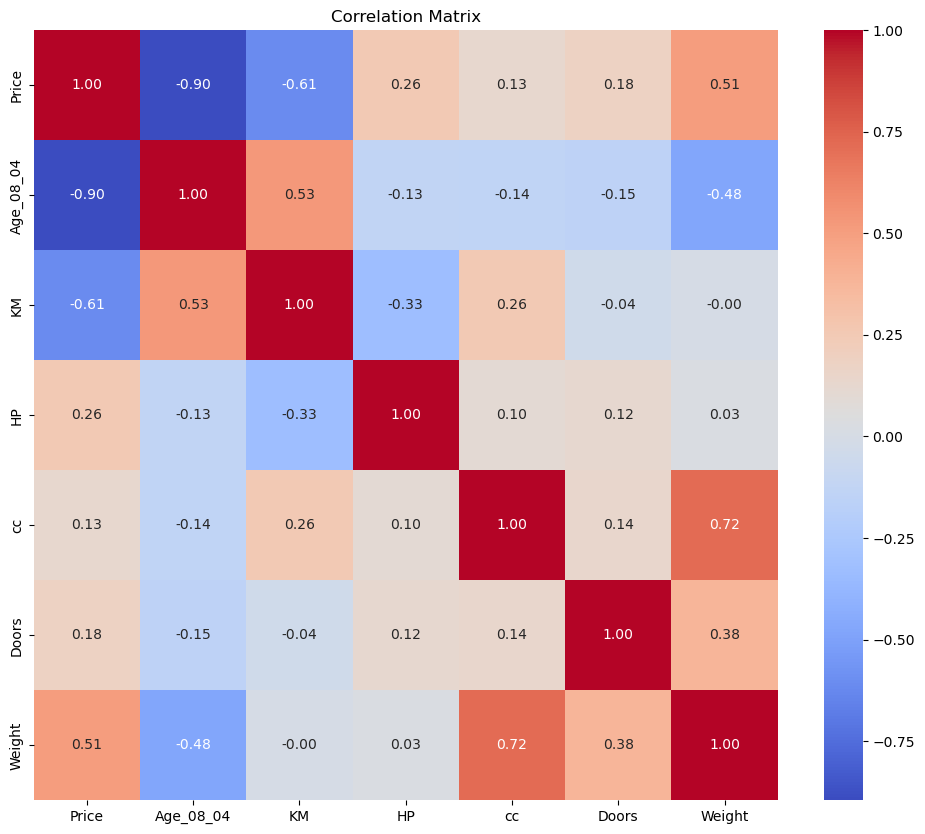

In [21]:
# displaying the corelation matrix with all variables

# Calculate the correlation matrix
correlation_matrix = df_num.corr()

# Display the correlation matrix
print(correlation_matrix)

# Identify strong and weak correlations
strong_correlations = correlation_matrix[abs(correlation_matrix) >= 0.7]
weak_correlations = correlation_matrix[abs(correlation_matrix) < 0.7]


# Display strong correlations
print("\nStrong Correlations:")
print(strong_correlations)


# Display weak correlations
print("\nWeak Correlations:")
print(weak_correlations)

# visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [22]:
# standardization of numerical variables
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X  = SS.fit_transform(df_num)
SS_X  = pd.DataFrame(SS_X)
SS_X.columns= list(df_num)
SS_X

,Price,Age_08_04,KM,HP,cc,Doors,Weight
0,1.006237,-1.775799,-0.593750,-0.844850,2.021383,-1.085139,2.222387
1,1.090108,-1.775799,0.153546,-0.844850,2.021383,-1.085139,2.222387
2,1.157205,-1.721920,-0.745652,-0.844850,2.021383,-1.085139,2.222387
3,1.492688,-1.614162,-0.564551,-0.844850,2.021383,-1.085139,2.222387
4,1.090108,-1.398645,-0.838117,-0.844850,2.021383,-1.085139,2.222387
...,...,...,...,...,...,...,...
1431,-1.006662,0.702643,-1.355186,-1.149198,-1.530776,-1.085139,-1.154070
1432,0.115529,0.864280,-1.399648,-1.149198,-1.530776,-1.085139,-1.418890
1433,-0.671179,0.810401,-1.456780,-1.149198,-1.530776,-1.085139,-1.418890
1434,-1.090533,0.756522,-1.459660,-1.149198,-1.530776,-1.085139,-1.418890


In [23]:
SS_X.shape

(1436, 7)

In [24]:
# Getting categorical variables
df_cat = df.drop(df.columns[[0,1,2,4,6,7,8,9]],axis=1)
df_cat

,Fuel_Type,Automatic
0,Diesel,0
1,Diesel,0
2,Diesel,0
3,Diesel,0
4,Diesel,0
...,...,...
1431,Petrol,0
1432,Petrol,0
1433,Petrol,0
1434,Petrol,0


In [25]:
# Label encode Fuel_Type variable

# Import the LabelEncoder class from sklearn
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Fuel_Type' column using the LabelEncoder
df_cat['Fuel_Type'] = le.fit_transform(df_cat['Fuel_Type'])

df_cat

,Fuel_Type,Automatic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1431,2,0
1432,2,0
1433,2,0
1434,2,0


In [26]:
# get the values and counts for Fuel_Type variable

# Group by Fuel_Type and get the counts
fuel_type_counts = df_cat.groupby('Fuel_Type')['Fuel_Type'].count()

fuel_type_counts

Fuel_Type
0      17
1     155
2    1264
Name: Fuel_Type, dtype: int64

In [27]:
df_cat.shape

(1436, 2)

In [28]:
# Combining numerical and categorical variables
df_final=pd.concat([df_cat,SS_X],axis=1)
df_final

,Fuel_Type,Automatic,Price,Age_08_04,KM,HP,cc,Doors,Weight
0,1,0,1.006237,-1.775799,-0.593750,-0.844850,2.021383,-1.085139,2.222387
1,1,0,1.090108,-1.775799,0.153546,-0.844850,2.021383,-1.085139,2.222387
2,1,0,1.157205,-1.721920,-0.745652,-0.844850,2.021383,-1.085139,2.222387
3,1,0,1.492688,-1.614162,-0.564551,-0.844850,2.021383,-1.085139,2.222387
4,1,0,1.090108,-1.398645,-0.838117,-0.844850,2.021383,-1.085139,2.222387
...,...,...,...,...,...,...,...,...,...
1431,2,0,-1.006662,0.702643,-1.355186,-1.149198,-1.530776,-1.085139,-1.154070
1432,2,0,0.115529,0.864280,-1.399648,-1.149198,-1.530776,-1.085139,-1.418890
1433,2,0,-0.671179,0.810401,-1.456780,-1.149198,-1.530776,-1.085139,-1.418890
1434,2,0,-1.090533,0.756522,-1.459660,-1.149198,-1.530776,-1.085139,-1.418890


In [29]:
# Defining X and Y for model fitting
Y = df_final["Price"]
X = df_final.drop(df_final[['Price']],axis=1)
X.head()

,Fuel_Type,Automatic,Age_08_04,KM,HP,cc,Doors,Weight
0,1,0,-1.775799,-0.593750,-0.84485,2.021383,-1.085139,2.222387
1,1,0,-1.775799,0.153546,-0.84485,2.021383,-1.085139,2.222387
2,1,0,-1.721920,-0.745652,-0.84485,2.021383,-1.085139,2.222387
3,1,0,-1.614162,-0.564551,-0.84485,2.021383,-1.085139,2.222387
4,1,0,-1.398645,-0.838117,-0.84485,2.021383,-1.085139,2.222387


In [30]:
X.shape

(1436, 8)

In [31]:
Y.head()

0    1.006237
1    1.090108
2    1.157205
3    1.492688
4    1.090108
Name: Price, dtype: float64

In [32]:
Y.shape

(1436,)

In [33]:
# Importing necessary packages
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Splitting data into test and train (model 1)
X_train_1,X_test_1,Y_train_1,Y_test_1  = train_test_split(X,Y, test_size=0.2,random_state=300)

# Model 1
model_1 = LinearRegression()
model_1.fit(X_train_1,Y_train_1)
Y_pred_train_1 = model_1.predict(X_train_1)
Y_pred_test_1 = model_1.predict(X_test_1)


# using sklearn build a multiple linear regression model using the training dataset.

# Create a Linear Regression model
model_1 = LinearRegression()

# Training the model using the training data
model_1.fit(X_train_1, Y_train_1)

# Get the coefficients
coefficients_1 = model_1.coef_
intercept_1 = model_1.intercept_

# Print the coefficients and intercept
print("Coefficients (Model 1):", np.round(coefficients_1,5))
print("Intercept (Model 1):", np.round(intercept_1,2))

# Evaluate the model
y_pred_1 = model_1.predict(X_test_1)

# Print model performance metrics
mse_1 = mean_squared_error(Y_test_1, y_pred_1)
r2_1 = r2_score(Y_test_1, y_pred_1)

print("Mean Squared Error (Model 1):", np.round(mse_1,2))
print("R-squared (Model 1):",np.round(r2_1,2))

Coefficients (Model 1): [ 0.13584 -0.0224  -0.67244 -0.17167  0.09058 -0.10079 -0.02925  0.29201]
Intercept (Model 1): -0.25
Mean Squared Error (Model 1): 0.13
R-squared (Model 1): 0.88


In [35]:
# Splitting data into test and train (model 2)
X_train_2,X_test_2,Y_train_2,Y_test_2  = train_test_split(X,Y, test_size=0.3,random_state=500)

# Model 2
model_2 = LinearRegression()
model_2.fit(X_train_2,Y_train_2)
Y_pred_train_2 = model_2.predict(X_train_2)
Y_pred_test_2 = model_2.predict(X_test_2)

# using sklearn build a multiple linear regression model using the training dataset.

# Create a Linear Regression model
model_2 = LinearRegression()

# Training the model using the training data
model_2.fit(X_train_2, Y_train_2)

# Get the coefficients
coefficients_2 = model_2.coef_
intercept_2 = model_2.intercept_

# Print the coefficients and intercept
print("Coefficients (Model 2):", np.round(coefficients_2,5))
print("Intercept (Model 2):", np.round(intercept_2,2))

# Evaluate the model
y_pred_2 = model_2.predict(X_test_2)

# Print model performance metrics
mse_2 = mean_squared_error(Y_test_2, y_pred_2)
r2_2 = r2_score(Y_test_2, y_pred_2)

print("Mean Squared Error (Model 2):", np.round(mse_2,2))
print("R-squared (Model 2):",np.round(r2_2,2))



Coefficients (Model 2): [ 0.19753  0.02555 -0.68555 -0.1443   0.07971 -0.09754 -0.02413  0.30539]
Intercept (Model 2): -0.36
Mean Squared Error (Model 2): 0.14
R-squared (Model 2): 0.87


In [148]:
# Lasso Regression model

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_1, Y_train_1)
y_pred_lasso = lasso_model.predict(X_test_1)

mse_lasso = mean_squared_error(Y_test_1, y_pred_lasso)
r2_lasso = r2_score(Y_test_1, y_pred_lasso)

print("Lasso Regression:")
print("Mean Squared Error (Lasso):", np.round(mse_lasso, 2))
print("R-squared (Lasso):", np.round(r2_lasso, 2))




Lasso Regression:
Mean Squared Error (Lasso): 0.18
R-squared (Lasso): 0.84

Ridge Regression:
Mean Squared Error (Ridge): 0.13
R-squared (Ridge): 0.88


In [37]:
 # Ridge Regression model

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_1, Y_train_1)
y_pred_ridge = ridge_model.predict(X_test_1)

mse_ridge = mean_squared_error(Y_test_1, y_pred_ridge)
r2_ridge = r2_score(Y_test_1, y_pred_ridge)

print("\nRidge Regression:")
print("Mean Squared Error (Ridge):", np.round(mse_ridge, 2))
print("R-squared (Ridge):", np.round(r2_ridge, 2))


Ridge Regression:
Mean Squared Error (Ridge): 0.13
R-squared (Ridge): 0.88


**Interview Questions:**


**1.What is Normalization & Standardization and how is it helpful?**


Normalization and Standardization are techniques used to rescale data. They are especially important in machine learning, as they can improve model performance and training stability.

**Normalization**

Normalization scales the data to a fixed range, usually between 0 and 1 or -1 and 1, without necessarily changing the shape of the data distribution. It’s typically used when features have different ranges, especially when dealing with algorithms sensitive to input ranges (e.g., neural networks or k-nearest neighbors).

Formula
𝑥
normalized
=
𝑥
−
𝑥
min
𝑥
max
−
𝑥
min
x
normalized
​
 =
x
max
​
 −x
min
​

x−x
min
​

​


**Standardization**

Standardization (or Z-score normalization) transforms data to have a mean of 0 and a standard deviation of 1, centering and scaling the data. This method is preferred when you need normally distributed data, as it doesn’t just scale but also shifts data to have a consistent center and spread.

Formula
𝑥
standardized
=
𝑥
−
𝜇
𝜎
x
standardized
​
 =
σ
x−μ
​

Where:


μ is the mean of the data


σ is the standard deviation

**2.What techniques can be used to address multicollinearity in multiple linear regression?**


Multicollinearity occurs in multiple linear regression when independent variables are highly correlated, which can destabilize model estimates and inflate standard errors, leading to unreliable coefficients. Here are several effective techniques for addressing multicollinearity:

1. Remove Highly Correlated Predictors

2. Combine Correlated Predictors

3. Regularization Techniques

4. Transform Variables

5. Use Partial Least Squares (PLS) Regression